```
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("../../Datasets/price.csv")
```
Yukarıda yer alan kodu kullanarak
1. Verinin içeriğine bakılması
2. Tarih Verisinin indis haline getirilmesi
3. frekansın iş günü haline getirilmesi
4. Bonds sütunu için grafik çizilmesi
5. Bonds Sütununu dikkate alarak `lags`,`shifted` değerlerinin hesaplanması
6. Bonds dikkate alarak yüzdelik değişimin hesaplanması 
işlemlerini gerçekleştirelim


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("../../Datasets/price.csv")

In [2]:
df

,DATE,SP500,Bonds,Gold,Oil
0,2007-06-29,1503.35,402.15,648.50,70.47
1,2007-07-02,1519.43,402.96,650.50,71.11
2,2007-07-03,1524.87,402.02,657.25,71.41
3,2007-07-05,1525.40,400.15,655.90,71.81
4,2007-07-06,1530.44,399.31,647.75,72.80
...,...,...,...,...,...
2464,2017-06-20,2437.03,621.84,1246.50,43.34
2465,2017-06-21,2435.61,622.94,1247.05,42.48
2466,2017-06-22,2434.50,622.93,1251.40,42.53
2467,2017-06-23,2438.30,623.57,1256.30,42.86


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
f = df.asfreq('B')

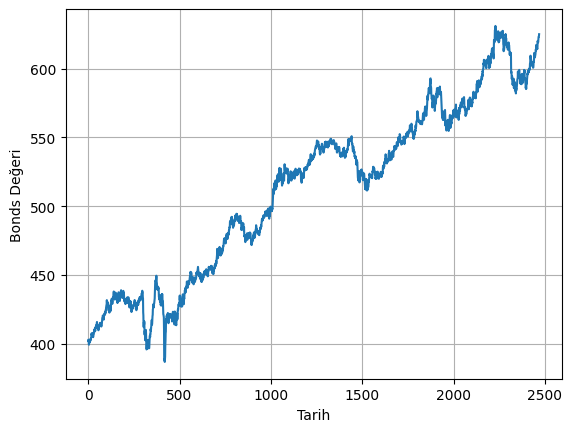

In [12]:
df['Bonds'].plot(grid=True)
plt.xlabel('Tarih')
plt.ylabel('Bonds Değeri')
plt.show()

In [13]:
lags = 5
df["lagged"] = df.Bonds.shift(periods=-1)

In [ ]:
df["change"] = df["Bonds"].div(df.shifted)
df.head()

In [14]:
df["pct_change"] = df.Bonds.pct_change().mul(100)
df.head()

,DATE,SP500,Bonds,Gold,Oil,Bonds_Lag_1,Bonds_Lag_2,Bonds_Lag_3,Bonds_Lag_4,Bonds_Lag_5,lagged,pct_change
0,2007-06-29,1503.35,402.15,648.50,70.47,NaN,NaN,NaN,NaN,NaN,402.96,NaN
1,2007-07-02,1519.43,402.96,650.50,71.11,402.15,NaN,NaN,NaN,NaN,402.02,0.201417
2,2007-07-03,1524.87,402.02,657.25,71.41,402.96,402.15,NaN,NaN,NaN,400.15,-0.233274
3,2007-07-05,1525.40,400.15,655.90,71.81,402.02,402.96,402.15,NaN,NaN,399.31,-0.465151
4,2007-07-06,1530.44,399.31,647.75,72.80,400.15,402.02,402.96,402.15,NaN,400.22,-0.209921


In [15]:
tarihler = pd.date_range(start='2023',periods=4,freq='Q')
veri = range(1,5)
seri1 = pd.Series(data=veri,index=tarihler)
seri1

2023-03-31    1
2023-06-30    2
2023-09-30    3
2023-12-31    4
Freq: Q-DEC, dtype: int64

In [16]:
aylik = seri1.asfreq('M')
aylik

2023-03-31    1.0
2023-04-30    NaN
2023-05-31    NaN
2023-06-30    2.0
2023-07-31    NaN
2023-08-31    NaN
2023-09-30    3.0
2023-10-31    NaN
2023-11-30    NaN
2023-12-31    4.0
Freq: M, dtype: float64

In [17]:
aylikdf = aylik.to_frame('baseline')
aylikdf

,baseline
2023-03-31,1.0
2023-04-30,NaN
2023-05-31,NaN
2023-06-30,2.0
2023-07-31,NaN
2023-08-31,NaN
2023-09-30,3.0
2023-10-31,NaN
2023-11-30,NaN
2023-12-31,4.0


In [18]:
aylikdf['ffill'] = aylikdf.baseline.asfreq('M',method='ffill')
aylikdf['bfill'] = aylikdf.baseline.asfreq('M',method='bfill')
aylikdf['deger'] = aylikdf.baseline.asfreq('M',fill_value=0)
aylikdf

,baseline,ffill,bfill,deger
2023-03-31,1.0,1.0,1.0,1.0
2023-04-30,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN
2023-06-30,2.0,2.0,2.0,2.0
2023-07-31,NaN,NaN,NaN,NaN
2023-08-31,NaN,NaN,NaN,NaN
2023-09-30,3.0,3.0,3.0,3.0
2023-10-31,NaN,NaN,NaN,NaN
2023-11-30,NaN,NaN,NaN,NaN
2023-12-31,4.0,4.0,4.0,4.0


In [21]:
df =  pd.read_csv("/workspace/timeseriesanalysandforecasting0712_1112_23/Datasets/unemployment rate.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    85 non-null     object 
 1   UNRATE  85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [23]:
df

,DATE,UNRATE
0,2010-01-01,9.8
1,2010-02-01,9.8
2,2010-03-01,9.9
3,2010-04-01,9.9
4,2010-05-01,9.6
...,...,...
80,2016-09-01,4.9
81,2016-10-01,4.8
82,2016-11-01,4.6
83,2016-12-01,4.7


In [25]:
# Genişletme
df = pd.read_csv("/workspace/timeseriesanalysandforecasting0712_1112_23/Datasets/price.csv",parse_dates=["DATE"],index_col=["DATE"])
df

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80
...,...,...,...,...
2017-06-20,2437.03,621.84,1246.50,43.34
2017-06-21,2435.61,622.94,1247.05,42.48
2017-06-22,2434.50,622.93,1251.40,42.53


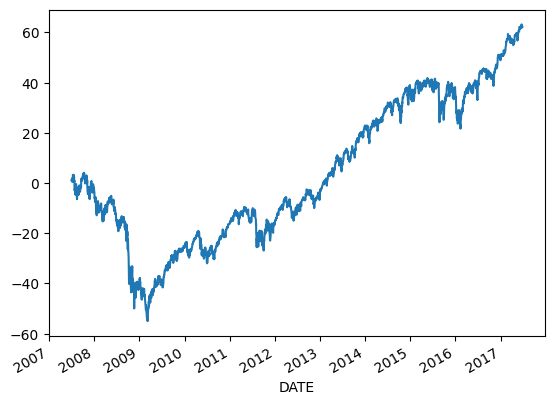

In [27]:
yd = df.SP500.pct_change()
yd_arti_1 = yd.add(1)
cumul_don = yd_arti_1.cumprod().sub(1)
cumul_don.mul(100).plot();

<Axes: xlabel='DATE'>

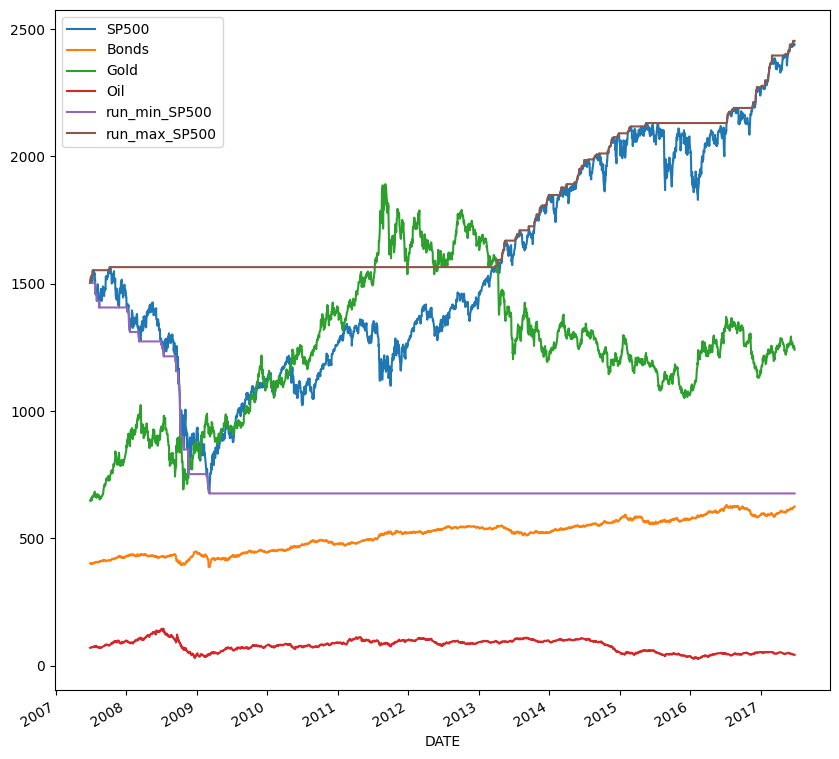

In [28]:
df["run_min_SP500"] = df.SP500.expanding().min()
df["run_max_SP500"] = df.SP500.expanding().max()
df.plot(figsize=(10,10))

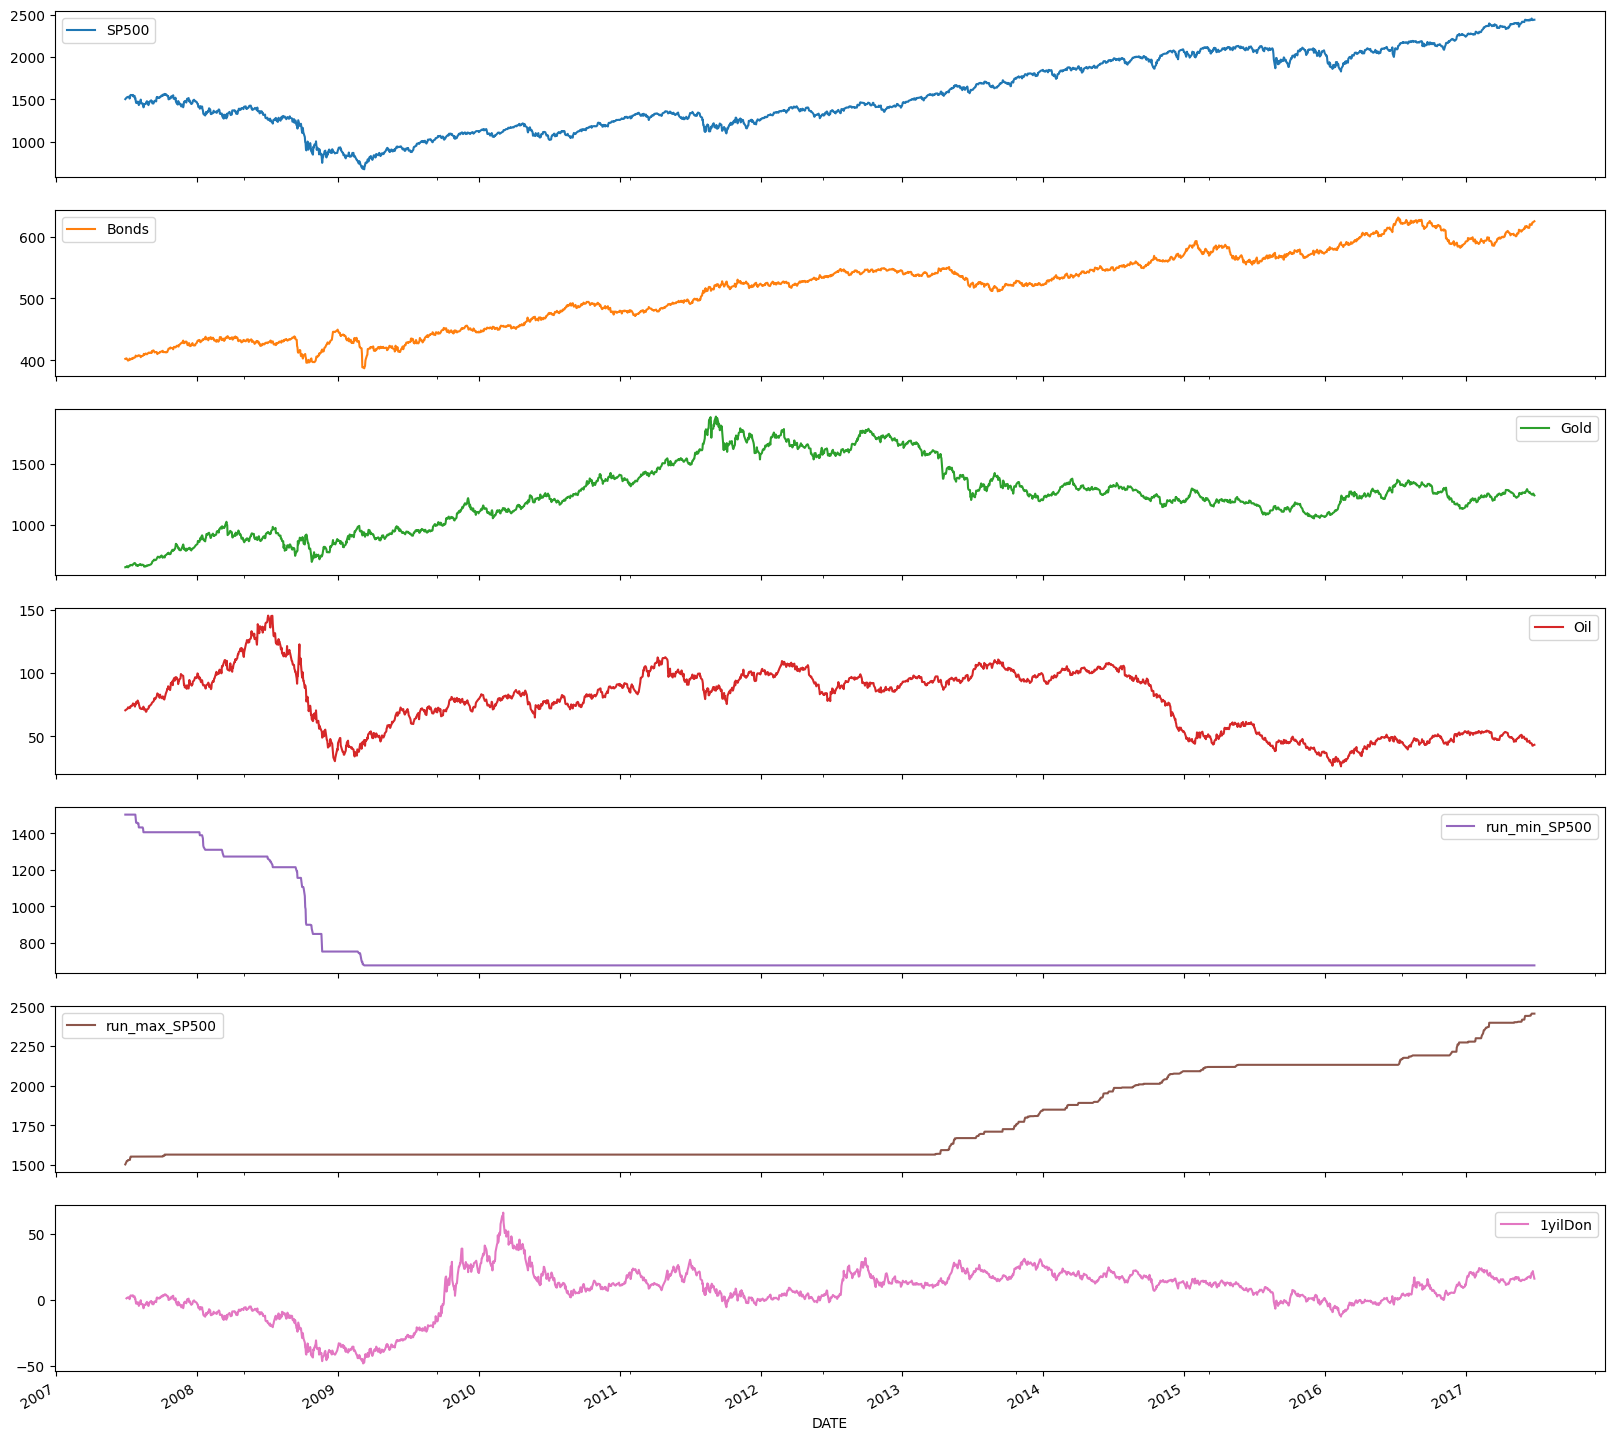

In [29]:
import numpy as np
def multi_per(per_return):
    return np.prod(per_return + 1) - 1
yd = df.SP500.pct_change()
r = yd.rolling('360D').apply(multi_per)
df["1yilDon"] = r.mul(100)
df.plot(subplots=True,figsize=(20,20));

In [30]:


veri = pd.read_csv('/workspace/timeseriesanalysandforecasting0712_1112_23/Datasets/SP500.csv',parse_dates=["DATE"],index_col="DATE")
veri

,SP500
DATE,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44
...,...
2017-06-20,2437.03
2017-06-21,2435.61
2017-06-22,2434.50


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

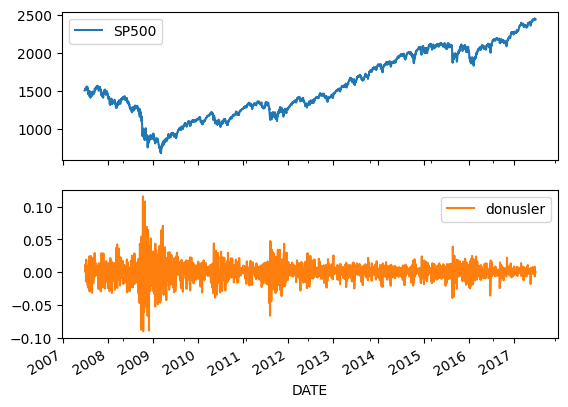

In [31]:
veri["donusler"] = veri.SP500.pct_change()
veri.plot(subplots=True)